# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Mahdi Koloushani 
2.   Student Number: 401300066


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(artists,plays,left_on='id',right_on='artistID')
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [4]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap=ap.drop(['id'],axis=1)
ap

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


temp1=ap.pivot_table(index=['name'], values=['artistID'], aggfunc='count')
temp2=ap.pivot_table(index=['name'], values=['playCount'],aggfunc=np.sum)
temp = pd.merge(temp1,temp2,left_on='name',right_on='name')
temp = temp.rename(columns={"artistID": "totalUniqueUsers","playCount": "totalArtistPlays"})
artist_rank = temp.sort_values(by=['totalArtistPlays'],ascending=False)

artist_rank['avgUserPlays'] = artist_rank.totalArtistPlays/artist_rank.totalUniqueUsers
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################
temp = pd.merge(artists,ap,left_on='name',right_on='name')
temp = pd.merge(temp,artist_rank,left_on='name',right_on='name')
ap = temp.sort_values(by=['playCount'],ascending=False)

ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


In [10]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x = x[:20], y = y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

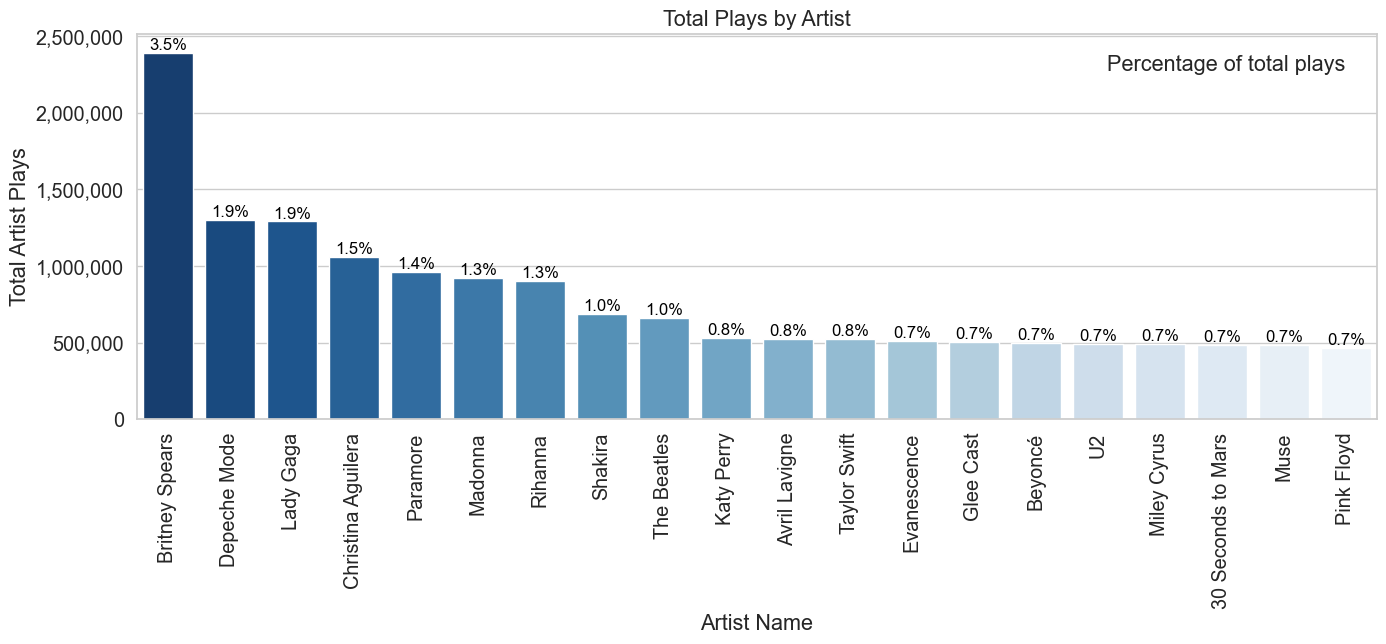

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

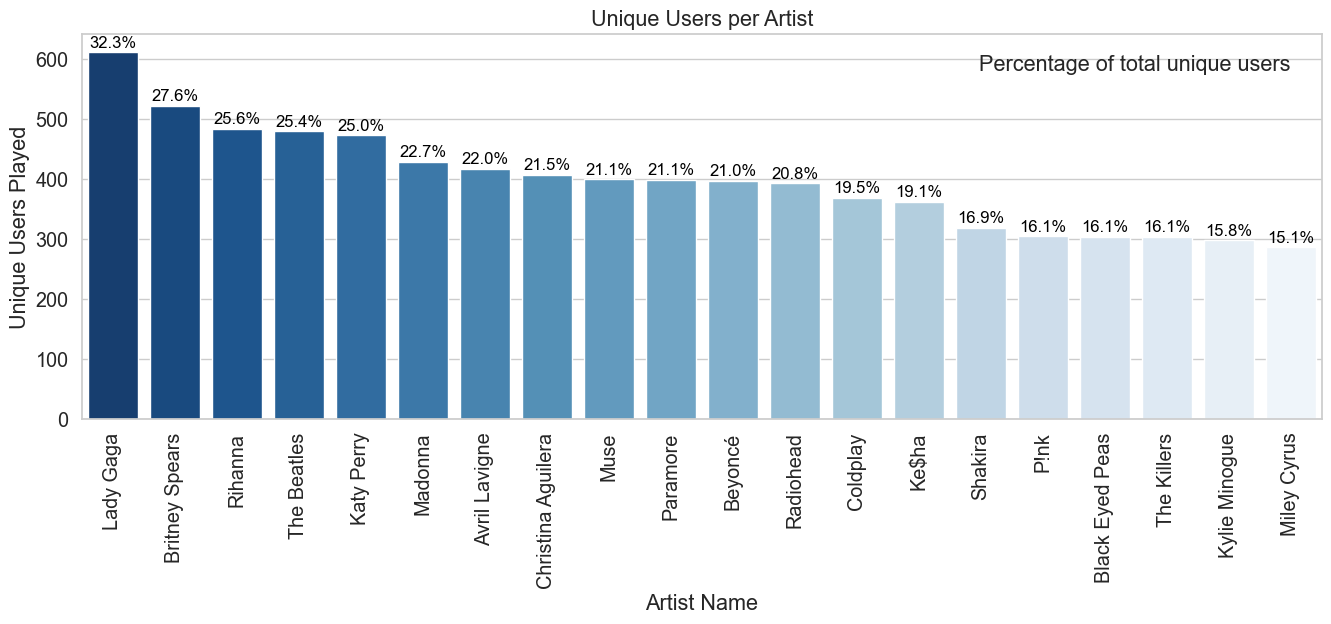

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

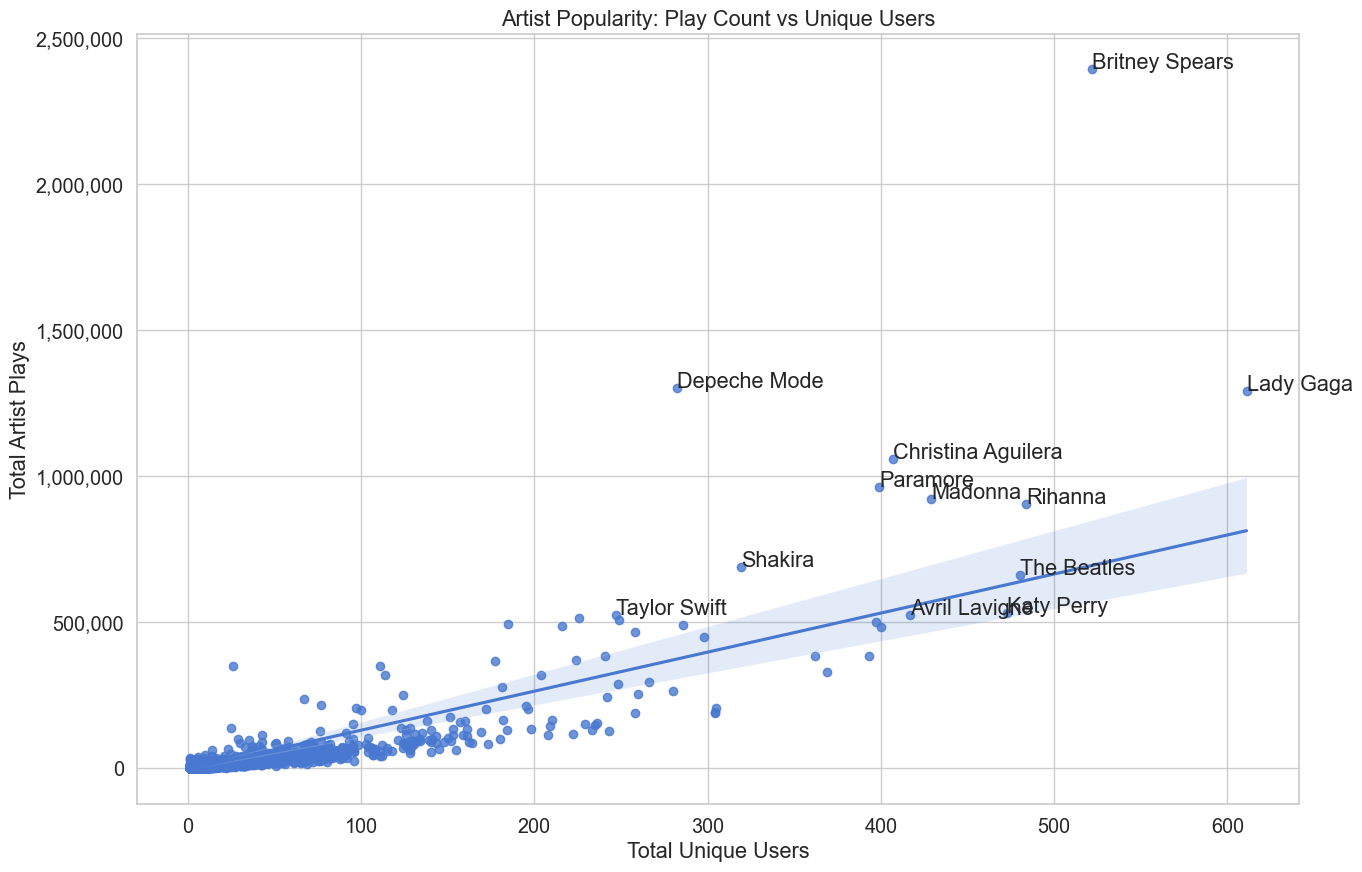

In [14]:
top_artists =  artist_rank.index[:12] # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,792,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,511,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,203,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,498,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,913,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,697,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,4988,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,17080,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot_table(index=['userID'], columns = ['artistID'],values=['playCountScaled'],)

In [17]:
ratings_df.columns = ratings_df.columns.droplevel([0])
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
temp = ratings_df.fillna(0)

ratings = temp.to_numpy()

In [19]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity = (1.0 - (np.count_nonzero(ratings) / float(ratings.size)))*100
print(sparsity)


## END

99.72362497745786


# Fitting(Training) Model (50pts)

In [20]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    # TODO
    train = ratings.copy()
    validation = np.zeros(ratings.shape)
    for i in range(ratings.shape[0]):
        if (ratings[i] != 0).sum() >= MIN_USER_RATINGS:
            indices = np.where(ratings[i] !=0)[0]
            rand_indices = np.random.choice(len(indices), size = DELETE_RATING_COUNT, replace=False)
            #print(rand_indices)
            for j in rand_indices:
                validation[i][indices[j]] = train[i][indices[j]]
                train[i][indices[j]] = 0
    return train, validation

In [21]:
train, val = train_test_split(ratings)

In [26]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[np.nonzero(ground_truth)] # TODO
    ground_truth = ground_truth[np.nonzero(ground_truth)] # TODO
    return sqrt(mean_squared_error(prediction, ground_truth))

In [27]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
        Rhat = np.transpose(P).dot(Q)
        return Rhat
  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
    
    train_nonzero = []
    for i in range(X_train.shape[0]):
        for j in range(X_train.shape[1]):
            if X_train[i,j]>0:
                train_nonzero.append((i, j, X_train[i,j]))
                
    P = np.random.normal(0,0.2,(self.n_latent_features,train.shape[0]))
    Q = np.random.normal(0,0.2,(self.n_latent_features,train.shape[1]))
    
    rmse_train = []
    rmse_validation = []
    for c in range(self.n_epochs):
        for i, j, r in train_nonzero:
            e = X_train[i,j]-np.multiply(P[:,i],Q[:,j]).sum()
            P[:,i] += self.learning_rate*(e*Q[:,j]-self.lmbda*P[:,i])
            Q[:,j] += self.learning_rate*(e*P[:,i]-self.lmbda*Q[:,j])
        predicted = self.predictions(P,Q)
        rmse_train.append([rmse(predicted, X_train)])
        rmse_validation.append([rmse(predicted, X_val)])
    self.rmse_train = rmse_train
    self.rmse_val = rmse_validation
    self.predicted = predicted
            
    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
   # prediction_unobserved = self.predicted[user_index*np.ones((1,len(np.nonzero(X_train[user_index,:])))),np.nonzero(X_train[user_index,:])]
    prediction_unobserved = self.predicted[user_index][X_train[user_index][:]==0]
    return prediction_unobserved

In [28]:
#creating recommender object
recommender = Recommender().fit(train, val)

Text(0, 0.5, 'Error')

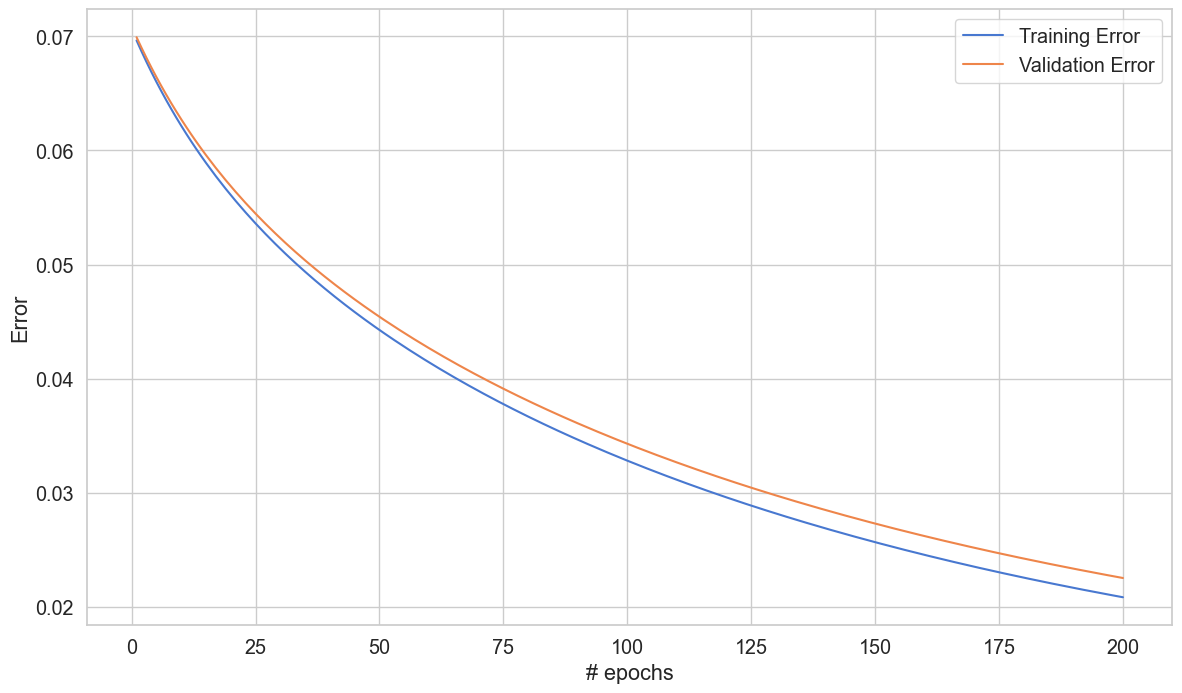

In [29]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

rmse_train = recommender.rmse_train
x = np.arange(len(rmse_train))+1
y = np.array(rmse_train)
plt.plot(x,y)
rmse_val = recommender.rmse_val
x = np.arange(len(rmse_val))+1
y = np.array(rmse_val)
plt.plot(x,y)
plt.legend(['Training Error', 'Validation Error'])
plt.xlabel('# epochs')
plt.ylabel('Error')
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [30]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [31]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))

    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
    artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
    artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
    return artist_recommendations.sort_values("rating", ascending=False)

In [32]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]
create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,472,3 Doors Down,0.043204
2,614,Pearl Jam,0.042016
3,923,Children of Bodom,0.025657
4,978,Disturbed,0.021690
5,1104,Rammstein,0.021562
6,1118,A Perfect Circle,0.020879
7,2172,Gojira,0.017051
8,6257,Rob Zombie,0.016280
9,6618,D12,0.010990


In [33]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,2141,Bill Elm and Woody Jackson,0.126698
1,4641,The Flatlands Collective,0.123326
2,7220,Les VRP,0.122878
3,10600,Mario Vazquez,0.122463
4,11491,Tiromancino,0.116666
5,12331,Eterea,0.116379
6,13737,The Beautiful Girls,0.113335
7,14749,Cee Lo Green,0.113009
8,18163,John Abercrombie,0.111758
9,18310,Above The Golden State,0.111602


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**